In [51]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import torch
from torch import nn, optim

from sklearn.metrics import r2_score

from qbstyles import mpl_style

mpl_style()
pd.options.display.float_format = "{:.4f}".format
torch.manual_seed(42)

In [52]:
def fit(model, x, y, criterion, epochs=10, lr=0.001):
    x = torch.tensor(x, dtype=torch.float).reshape(-1, 1)
    y = torch.tensor(y, dtype=torch.float).reshape(-1, 1)
    optimizer = optim.SGD(model.parameters(), lr=lr)
    losses = []
    accuracies = []
    
    for epoch in range(1, epochs + 1):
        model.train()
        cost = 0
        for i in range(x.shape[0]):
            yhat = model(x[i])
            loss = criterion(yhat, y[i])
            optimizer.zero_grad()
            loss.backward()
            optimizer.step()
            cost += loss.item()
        losses.append(cost / x.shape[0])
        
        model.eval()
        with torch.no_grad():
            y_pred = model(x)
            accuracy = r2_score(y, y_pred)
        accuracies.append(accuracy)
        
        print(f"Epochs {epoch}/{epochs}: loss = {losses[-1]:.4f}, {accuracy = :.4f}")
    
    print()
    print("=" * 20)
    print()
    return losses, accuracies

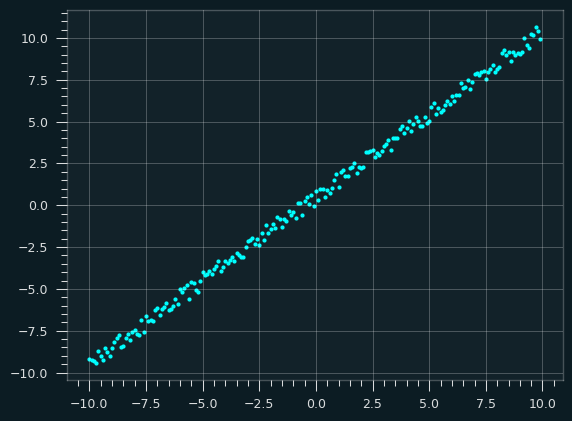

In [9]:
x = np.arange(-10, 10, 0.1)
noise = np.random.rand(len(x))
y = x + noise

plt.scatter(x, y, color='cyan', marker='.')

In [3]:
df = pd.DataFrame({'x': x, 'y': y})
df.head()

,x,y
0,-10.0,-9.463819
1,-9.9,-9.757638
2,-9.8,-8.990984
3,-9.7,-8.853397
4,-9.6,-9.397774


In [82]:
torch.manual_seed(42)
relu_model = nn.Sequential(
    nn.Linear(1, 1),
    nn.ReLU(),
    nn.Linear(1, 1),
)

torch.manual_seed(42)
tanh_model = nn.Sequential(
    nn.Linear(1, 1),
    nn.Tanh(),
    nn.Linear(1, 1),
)

torch.manual_seed(42)
sigmoid_model = nn.Sequential(
    nn.Linear(1, 1),
    nn.Sigmoid(),
    nn.Linear(1, 1),
)

In [83]:
epochs = 20

relu_loss, relu_acc = fit(relu_model, x, y, nn.MSELoss(), epochs)
tanh_loss, tanh_acc = fit(tanh_model, x, y, nn.MSELoss(), epochs)
sigmoid_loss, sigmoid_acc = fit(sigmoid_model, x, y, nn.MSELoss(), epochs)

Epochs 1/20: loss = 18.5282, accuracy = 0.5210
Epochs 2/20: loss = 13.8271, accuracy = 0.6313
Epochs 3/20: loss = 10.8936, accuracy = 0.7013
Epochs 4/20: loss = 8.9577, accuracy = 0.7467
Epochs 5/20: loss = 7.6481, accuracy = 0.7773
Epochs 6/20: loss = 6.7272, accuracy = 0.7994
Epochs 7/20: loss = 6.0385, accuracy = 0.8175
Epochs 8/20: loss = 5.4741, accuracy = 0.8343
Epochs 9/20: loss = 4.9600, accuracy = 0.8518
Epochs 10/20: loss = 4.4357, accuracy = 0.8708
Epochs 11/20: loss = 3.8797, accuracy = 0.8897
Epochs 12/20: loss = 3.3445, accuracy = 0.9051
Epochs 13/20: loss = 2.9115, accuracy = 0.9170
Epochs 14/20: loss = 2.5540, accuracy = 0.9271
Epochs 15/20: loss = 2.2454, accuracy = 0.9357
Epochs 16/20: loss = 1.9830, accuracy = 0.9429
Epochs 17/20: loss = 1.7623, accuracy = 0.9491
Epochs 18/20: loss = 1.5736, accuracy = 0.9543
Epochs 19/20: loss = 1.4106, accuracy = 0.9589
Epochs 20/20: loss = 1.2700, accuracy = 0.9628


Epochs 1/20: loss = 27.2121, accuracy = 0.3717
Epochs 2/20: loss

In [84]:
activation_losses = pd.DataFrame({
    "relu_losses": relu_loss,
    "tanh_losses": tanh_loss,
    "sigmoid_losses": sigmoid_loss,
})

activation_accuracies = pd.DataFrame({
    "relu_accuracies": relu_acc,
    "tanh_accuracies": tanh_acc,
    "sigmoid_accuracies": sigmoid_acc,
})

In [85]:
activation_losses

,relu_losses,tanh_losses,sigmoid_losses
0,18.5282,27.2121,31.5928
1,13.8271,16.5268,28.5746
2,10.8936,11.1528,25.9487
3,8.9577,8.3392,23.5456
4,7.6481,6.4738,21.3706
5,6.7272,4.6341,19.4217
6,6.0385,3.5133,17.6890
7,5.4741,2.8040,16.1570
8,4.9600,2.2969,14.8065
9,4.4357,1.9211,13.6174


<Axes: >

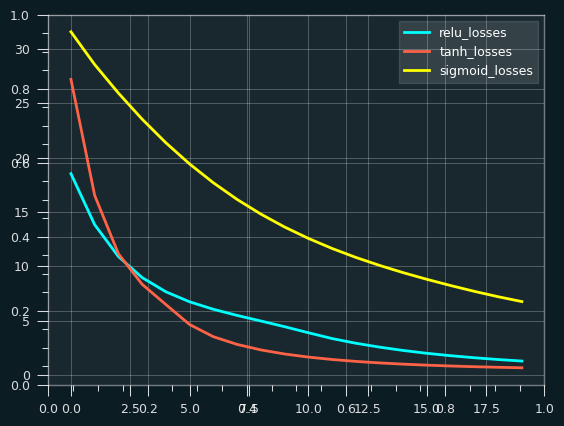

In [86]:
activation_losses.plot.line(color=["cyan", "tomato", "yellow"], linewidth=2)

In [87]:
activation_accuracies

,relu_accuracies,tanh_accuracies,sigmoid_accuracies
0,0.5210,0.3717,0.0711
1,0.6313,0.5973,0.1569
2,0.7013,0.7115,0.2354
3,0.7467,0.7752,0.3067
4,0.7773,0.8282,0.3707
5,0.7994,0.8647,0.4277
6,0.8175,0.8831,0.4782
7,0.8343,0.8939,0.5228
8,0.8518,0.9000,0.5620
9,0.8708,0.9032,0.5966


<Axes: >

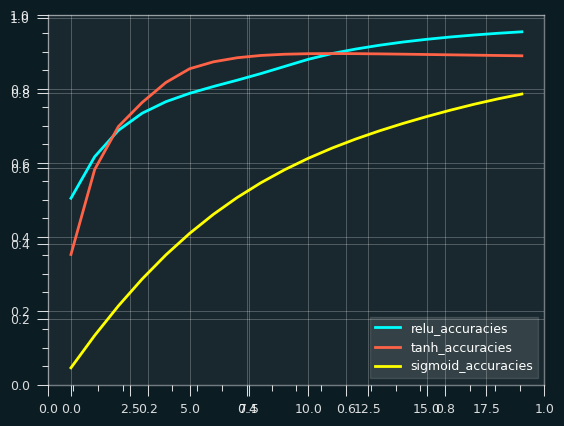

In [88]:
activation_accuracies.plot.line(
    color=["cyan", "tomato", "yellow"], 
    linewidth=2,
    # figsize=()
)